<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-07 10:45:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.18’

survey-data.csv.18  100%[===================>] 152.13M  76.4MB/s    in 2.0s    

2025-03-07 10:45:28 (76.4 MB/s) - ‘survey-data.csv.18’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


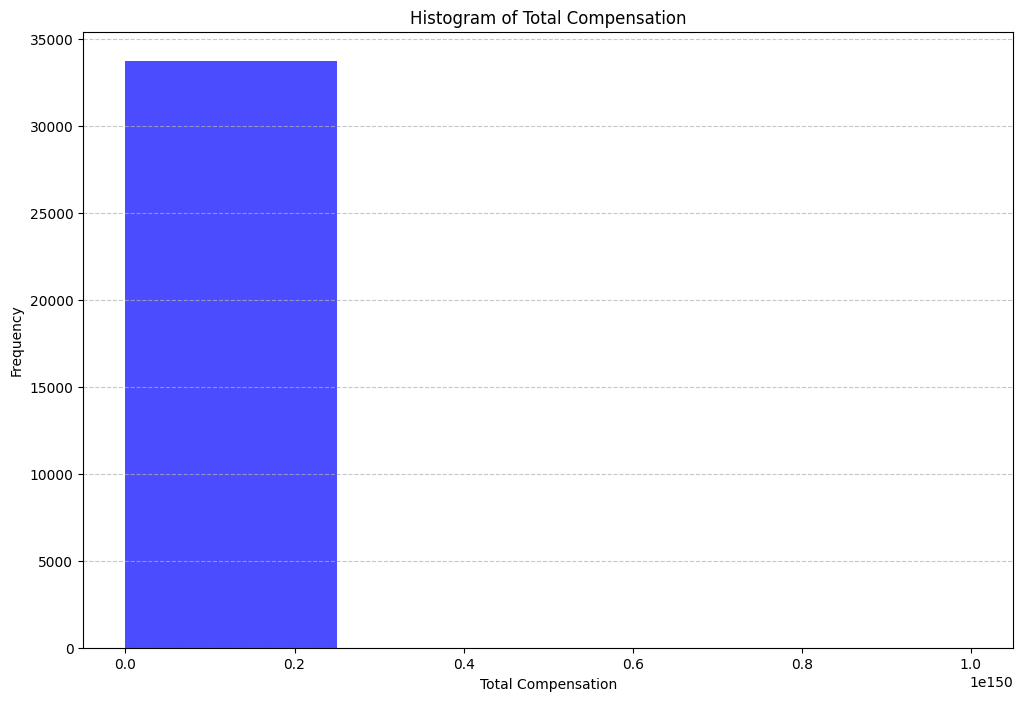

In [10]:
# Extract column CompTotal
df_comp = pd.read_sql_query("SELECT CompTotal FROM main",conn)

# Plot the histogram
plt.figure(figsize=(12,8))
plt.hist(df_comp["CompTotal"].dropna(),bins=4,color="blue",alpha=0.7)
plt.title("Histogram of Total Compensation")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Box Plots**

Plot a box plot of Age.


In [11]:
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70,
    "Prefer not to say": np.nan
}

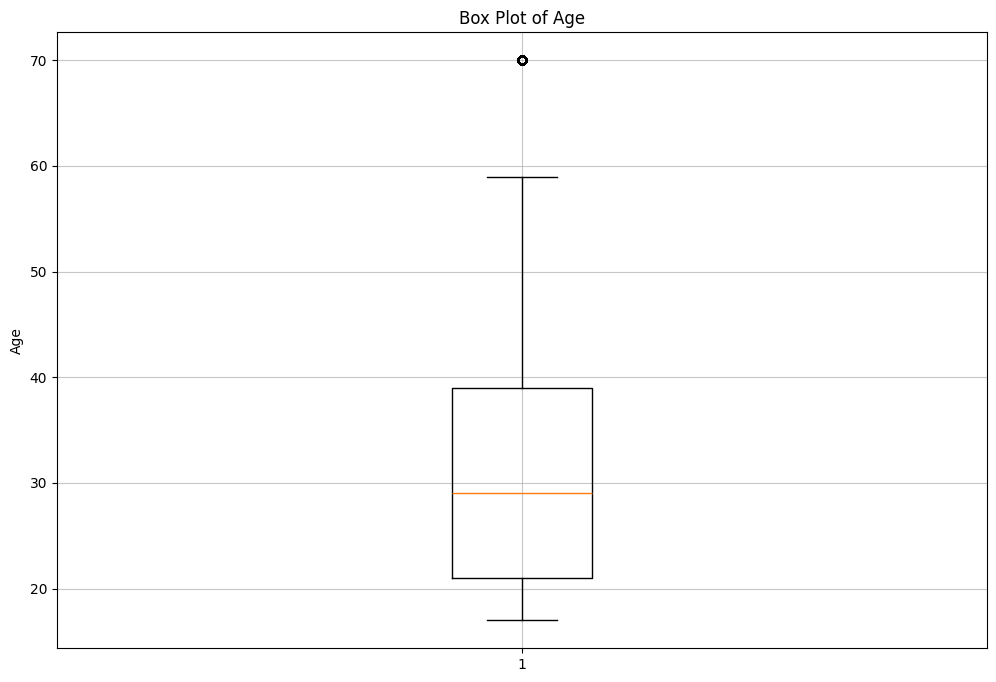

In [12]:
# Extract column Age
df_age = pd.read_sql_query("SELECT Age FROM main", conn)

# Use the same Age mapping as df_bubble
df_age['Age_numeric'] = df_age['Age'].map(age_map)

# Drop missing values
df_age = df_age.dropna(subset=['Age_numeric'])

# Plot box plot
plt.figure(figsize=(12, 8))
plt.boxplot(df_age["Age_numeric"].dropna())
plt.title("Box Plot of Age")
plt.ylabel("Age")
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


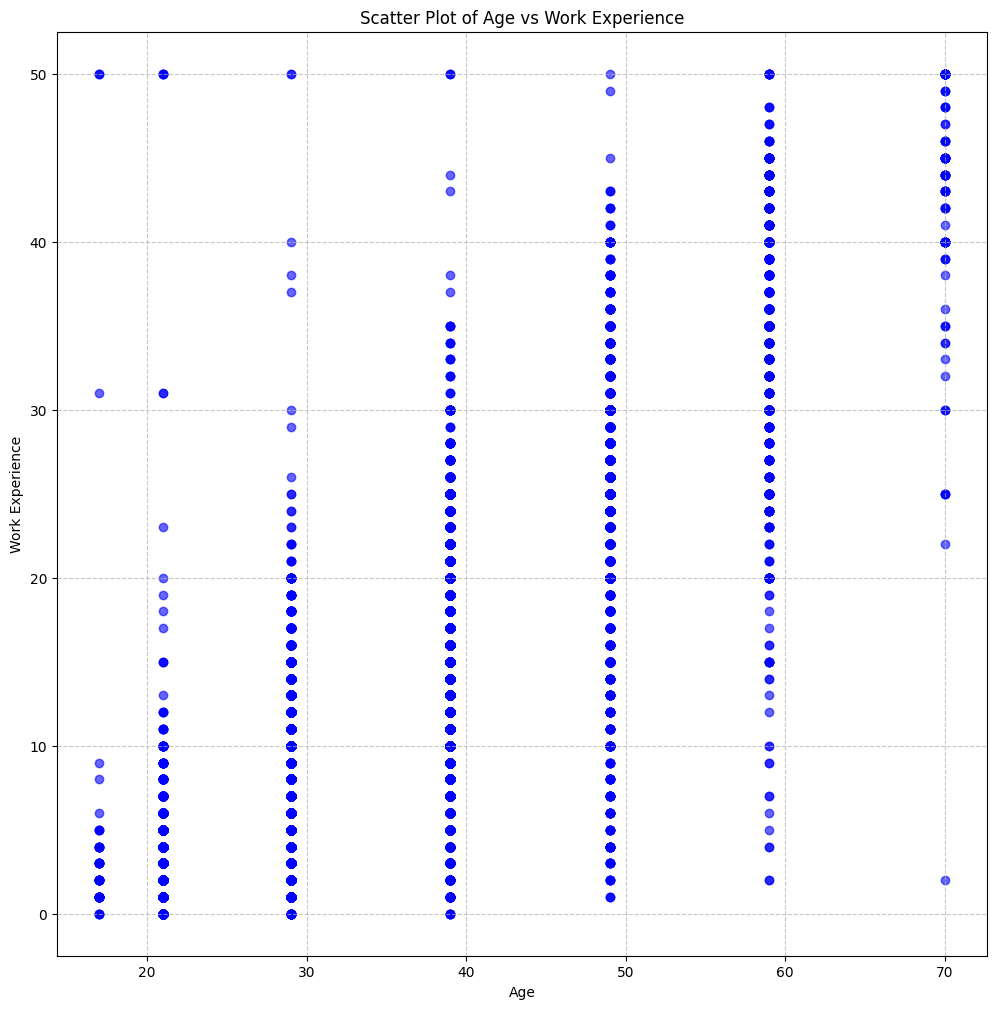

In [13]:
# Extract specific column
df_scatter = pd.read_sql_query("SELECT Age, WorkExp FROM main", conn)

# Use the same Age mapping as df_bubble
df_scatter['Age_numeric'] = df_scatter['Age'].map(age_map)

# Drop missing values
df_scatter = df_scatter.dropna(subset=['Age_numeric', 'WorkExp'])

# Plot the scatter plot
plt.figure(figsize=(12, 12))
plt.scatter(df_scatter['Age_numeric'], df_scatter['WorkExp'], alpha=0.6, color='blue')
plt.title("Scatter Plot of Age vs Work Experience")
plt.xlabel("Age")
plt.ylabel("Work Experience")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


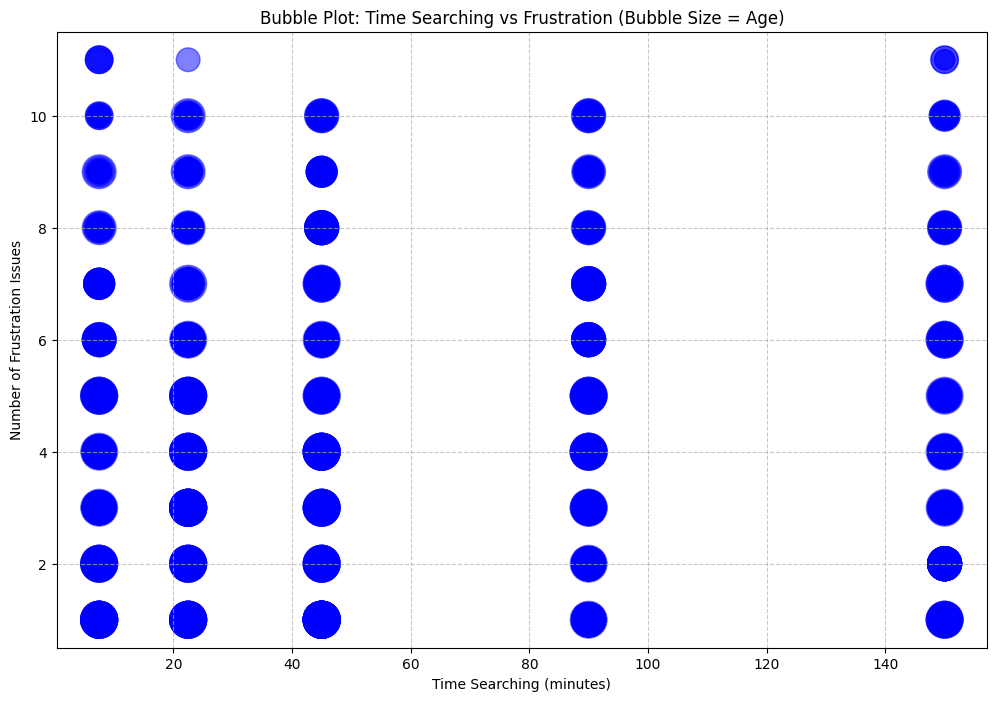

In [14]:
# Query dataset
query = "SELECT Age, TimeSearching, Frustration FROM main"
df_bubble = pd.read_sql_query(query, conn)

# Convert Age
df_bubble['Age_numeric'] = df_bubble['Age'].map(age_map)

# Convert Time Searching
time_map = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}
df_bubble['TimeSearching_numeric'] = df_bubble['TimeSearching'].map(time_map)

# Convert Frustration to number of issues selected
df_bubble['Frustration_numeric'] = df_bubble['Frustration'].apply(lambda x: len(str(x).split(';')))

# Drop missing values
df_bubble = df_bubble.dropna(subset=['Age_numeric', 'TimeSearching_numeric', 'Frustration_numeric'])

# Create the bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(df_bubble['TimeSearching_numeric'], df_bubble['Frustration_numeric'], 
            s=df_bubble['Age_numeric'] * 10, alpha=0.5, color='blue')

plt.xlabel("Time Searching (minutes)")
plt.ylabel("Number of Frustration Issues")
plt.title("Bubble Plot: Time Searching vs Frustration (Bubble Size = Age)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


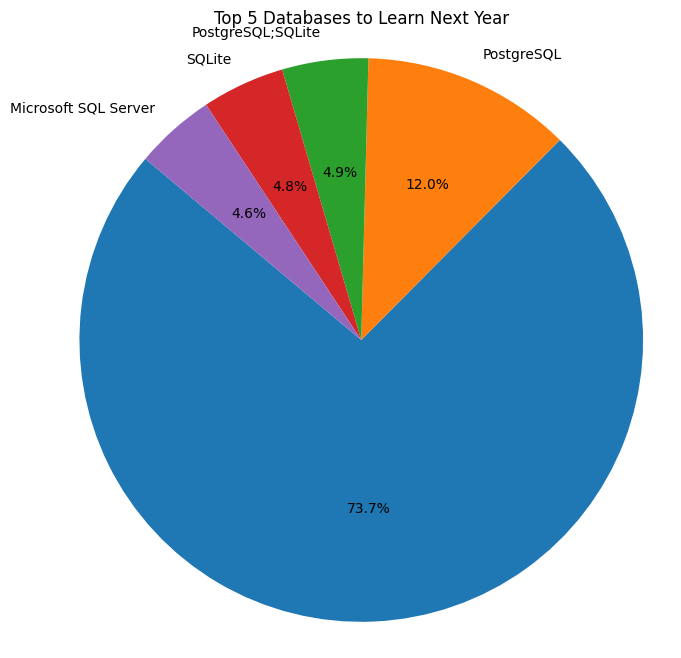

In [15]:
## Filter the top 5 databases from the data
query_pie = """
SELECT DatabaseWantToWorkWith, COUNT(*) as count
FROM main
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 5
"""
df_pie = pd.read_sql_query(query_pie, conn)

plt.figure(figsize=(8,8))
plt.pie(df_pie['count'], labels=df_pie['DatabaseWantToWorkWith'], 
        autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Databases to Learn Next Year")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()


Filter out the 'None' entry as exclude the missing values

Queried DataFrame:
  DatabaseWantToWorkWith  count
0                   None  22879
1             PostgreSQL   3738
2      PostgreSQL;SQLite   1533
3                 SQLite   1476
4   Microsoft SQL Server   1431
5                  MySQL   1139


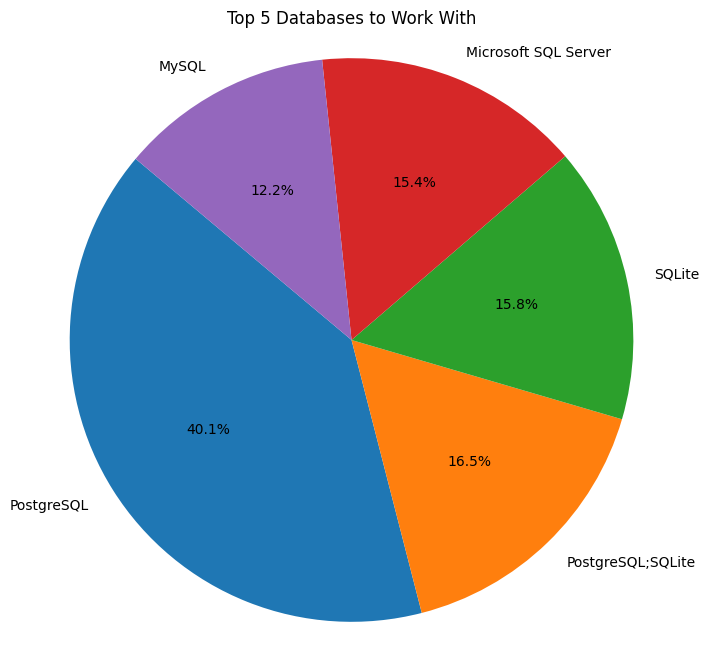

In [16]:
# Query to get the top 5 databases respondents wish to work with
query = """
SELECT DatabaseWantToWorkWith, COUNT(*) as count
FROM main
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 6
"""
df_db = pd.read_sql_query(query, conn)
print("Queried DataFrame:")
print(df_db)

# Optionally, filter out the 'None' entry if you want to exclude missing values
df_db = df_db[df_db['DatabaseWantToWorkWith'].notna()]

# Create a pie chart of the top 5 databases
plt.figure(figsize=(8,8))
plt.pie(df_db['count'], labels=df_db['DatabaseWantToWorkWith'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Databases to Work With")
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


Number of rows for '25-34 years old': 12519
Median Time Searching: 30.0
Median Time Answering: 15.0


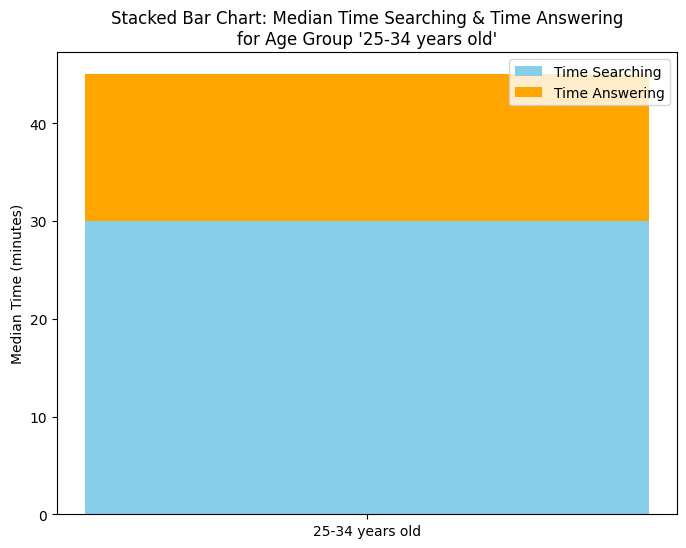

In [17]:
# Query the required columns for the age group '25-34 years old'
query = """
SELECT Age, TimeSearching, TimeAnswering 
FROM main 
WHERE Age = '25-34 years old'
"""
df = pd.read_sql_query(query, conn)

# Convert TimeSearching and TimeAnswering to numeric by extracting the first number from each string.
# For example, "30-60 minutes a day" will yield 30.
df['TimeSearching_numeric'] = pd.to_numeric(
    df['TimeSearching'].str.extract(r'(\d+)', expand=False),
    errors='coerce'
)
df['TimeAnswering_numeric'] = pd.to_numeric(
    df['TimeAnswering'].str.extract(r'(\d+)', expand=False),
    errors='coerce'
)

# Drop rows with missing numeric values (if any)
df = df.dropna(subset=['TimeSearching_numeric', 'TimeAnswering_numeric'])

print("Number of rows for '25-34 years old':", len(df))

# Calculate median values for the group
median_time_searching = df['TimeSearching_numeric'].median()
median_time_answering = df['TimeAnswering_numeric'].median()

print("Median Time Searching:", median_time_searching)
print("Median Time Answering:", median_time_answering)

# Create a stacked bar chart for the medians
plt.figure(figsize=(8,6))
# First bar: Time Searching
plt.bar('25-34 years old', median_time_searching, label='Time Searching', color='skyblue')
# Second bar: Time Answering stacked on top of Time Searching
plt.bar('25-34 years old', median_time_answering, bottom=median_time_searching, label='Time Answering', color='orange')
plt.ylabel("Median Time (minutes)")
plt.title("Stacked Bar Chart: Median Time Searching & Time Answering\nfor Age Group '25-34 years old'")
plt.legend()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


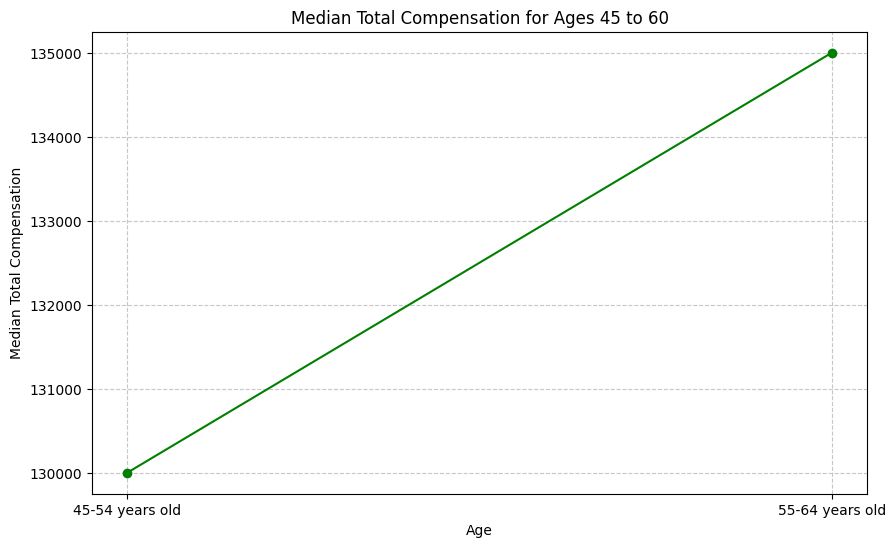

In [18]:
query_line = """
SELECT Age, CompTotal
FROM main
WHERE Age BETWEEN 45 AND 60
"""
# Retrieve data from the query
df_line = pd.read_sql_query(query_line, conn)

# Group by Age and calculate the median Total Compensation
df_median = df_line.groupby("Age")["CompTotal"].median().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_median["Age"], df_median["CompTotal"], marker="o", linestyle="-", color="green")
plt.xlabel("Age")
plt.ylabel("Median Total Compensation")
plt.title("Median Total Compensation for Ages 45 to 60")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


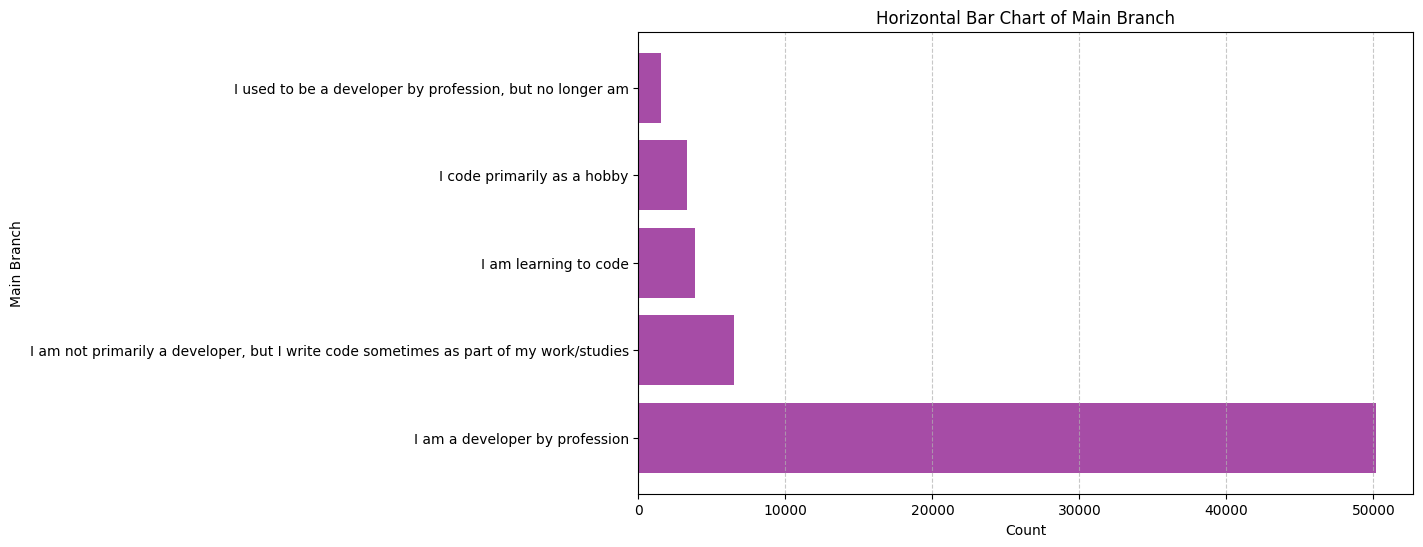

In [19]:
# Query to get counts for each MainBranch category
query = """
SELECT MainBranch, COUNT(*) as count
FROM main
GROUP BY MainBranch
ORDER BY count DESC
"""
df_bar = pd.read_sql_query(query, conn)

# Create a horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(df_bar['MainBranch'], df_bar['count'], color='purple', alpha=0.7)
plt.xlabel("Count")
plt.ylabel("Main Branch")
plt.title("Horizontal Bar Chart of Main Branch")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [20]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
